## 10 - Spectral Analysis I: Fourier Transform

### 10.1 Introduction to Spectral Analysis
- Spectral analysis involves decomposing a time series into its constituent frequencies.

- It provides insight into periodic patterns and cycles within the data that might not be obvious in the time domain.

### 10.2  Fourier Transform

- The Fourier Transform converts a time series from the time domain to the frequency domain. 

- Discrete Fourier Transform (DFT): used for digital time series data.

-  Fast Fourier Transform (FFT): an efficient algorithm to compute the DFT.

- Mathematical representation: 

Fourier Transform:

$$ X(f) = \sum_{t=0}^{N-1} x(t) e^{-i2\pi ft}.$$

Inverse Fourier Transform:

$$x(t) = \frac{1}{N} \sum_{f=0}^{N-1} X(f) e^{i2\pi ft}.$$

### 10.3 Power Spectral Density (PSD) and Periodogram

- PSD represents the power of different frequency components in the time series. It helps to identify dominant frequencies.

- The periodogram is a common method for estimating the PSD.

- Mathematical representation:

The periodogram $P(f)$ of a discrete time series $x(t)$ is given by 
$$P(f) = \frac{1}{N} \left| \sum_{t=0}^{N-1} x(t) e^{-i2\pi ft} \right|^2= \frac{1}{N} |X(f)|^2.$$

- Interpretation of the Periodogram:
1. The x-axis of the periodogram represents the frequency components.

2. The y-axis represents the power (or amplitude squared) associated with each frequency.

3. Peaks in the periodogram indicate dominant frequencies in the time series.

4. These dominant frequencies correspond to periodic components in the original time series.

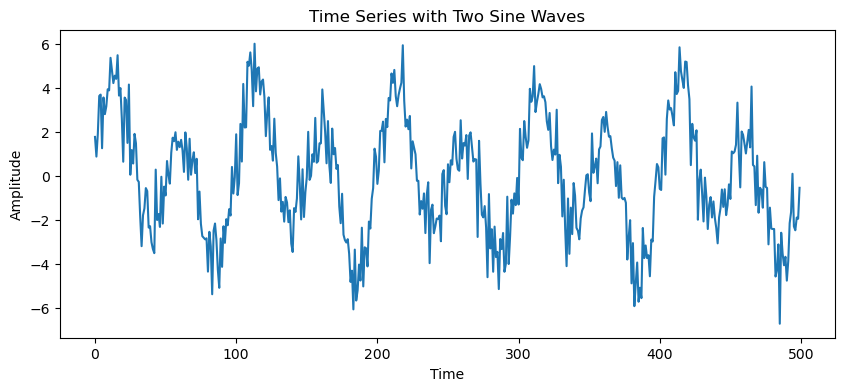

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series with two sine waves
np.random.seed(0)
n = 500
t = np.arange(n)
signal = 3 * np.sin(2 * np.pi * t / 50) + 1.5 * np.sin(2 * np.pi * t / 100) + np.random.normal(0, 1, n)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Time Series with Two Sine Waves')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

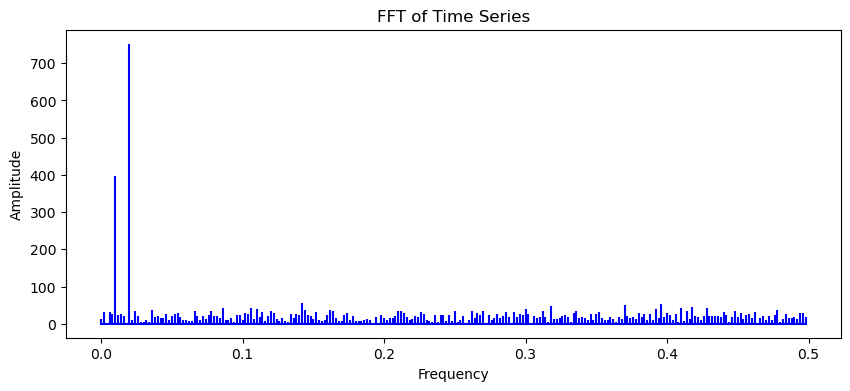

Dominant Frequencies:  [ 0.142 -0.01   0.01  -0.02   0.02 ]
Dominant Amplitudes:  [ 54.62572879 397.09892219 397.09892219 752.28374535 752.28374535]


In [4]:
# Apply FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n)

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:n // 2], np.abs(fft_result)[:n // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of Time Series')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Extract the highest frequencies
indices = np.argsort(np.abs(fft_result))[-5:]  # Top 5 frequencies
dominant_frequencies = frequencies[indices]
dominant_amplitudes = np.abs(fft_result)[indices]

print("Dominant Frequencies: ", dominant_frequencies)
print("Dominant Amplitudes: ", dominant_amplitudes)

/var/folders/4j/p29_40d112l19pb5yt8t3w_c0000gn/T/ipykernel_46129/907948603.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.stem(1/frequencies[:n // 2], np.abs(fft_result)[:n // 2], 'b', markerfmt=" ", basefmt="-b")


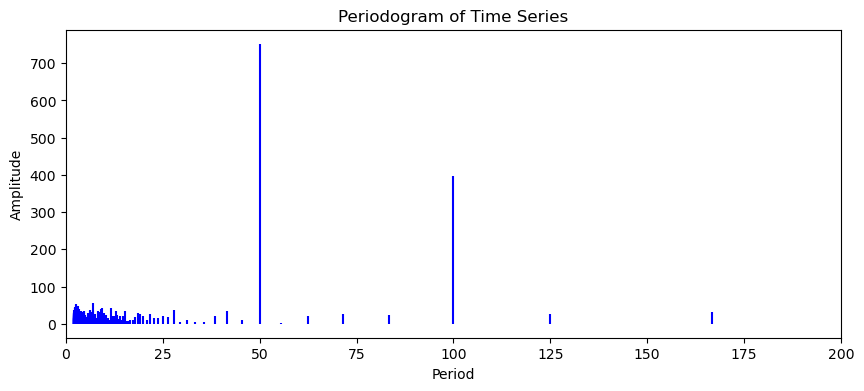

In [5]:
# Plot periodogram
plt.figure(figsize=(10, 4))
plt.stem(1/frequencies[:n // 2], np.abs(fft_result)[:n // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('Periodogram of Time Series')
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0, 200)  # Adjust the x-axis limit for better visualization
plt.show()

### 10.4 Real-world Applications

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


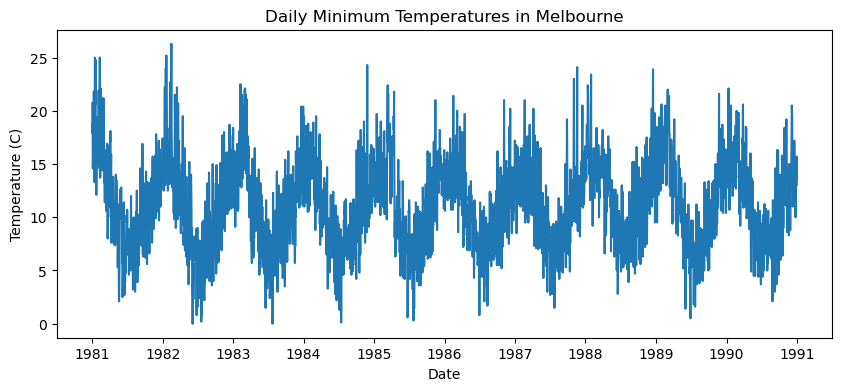

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Download the dataset from a public URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(data.head())

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Temp'])
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

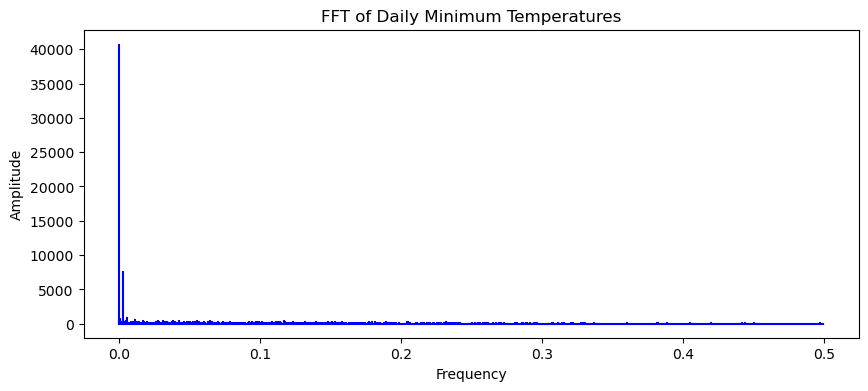

Dominant Frequencies:  [ 0.00547945 -0.00547945  0.00273973 -0.00273973  0.        ]
Dominant Amplitudes:  [ 1038.54262303  1038.54262303  7686.887092    7686.887092
 40798.8       ]


In [7]:
# Extract the temperature values
temps = data['Temp'].values

# Apply FFT
fft_result = np.fft.fft(temps)
frequencies = np.fft.fftfreq(len(temps))

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:len(temps) // 2], np.abs(fft_result)[:len(temps) // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of Daily Minimum Temperatures')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Extract the highest frequencies
indices = np.argsort(np.abs(fft_result))[-5:]  # Top 5 frequencies
dominant_frequencies = frequencies[indices]
dominant_amplitudes = np.abs(fft_result)[indices]

print("Dominant Frequencies: ", dominant_frequencies)
print("Dominant Amplitudes: ", dominant_amplitudes)


In [10]:
1/0.00273973

364.9994707507674

/var/folders/4j/p29_40d112l19pb5yt8t3w_c0000gn/T/ipykernel_46129/126876504.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.stem(1/frequencies[:len(temps) // 2], np.abs(fft_result)[:len(temps) // 2], 'b', markerfmt=" ", basefmt="-b")


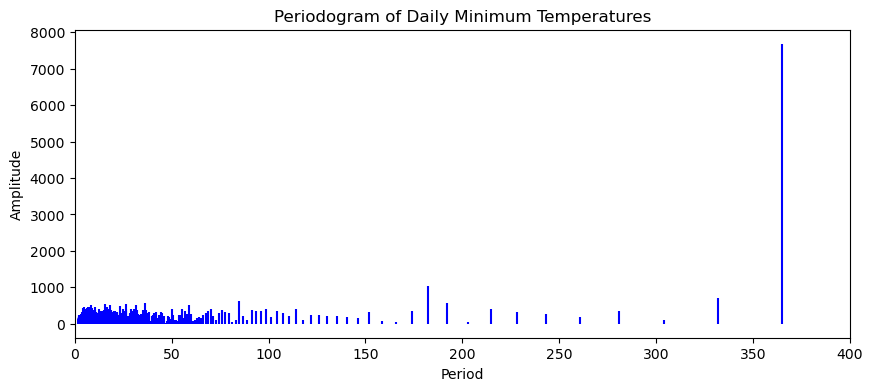

In [8]:
# Plot periodogram
plt.figure(figsize=(10, 4))
plt.stem(1/frequencies[:len(temps) // 2], np.abs(fft_result)[:len(temps) // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('Periodogram of Daily Minimum Temperatures')
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0, 400)  # Adjust the x-axis limit for better visualization
plt.show()

## 11 - Spectral Analysis II: Sinusoidal Models

### 11.1 Introduction to Sinusoidal Models

- Sinusoidal models are used to represent periodic components in time series data.

- These models are especially useful when the time series exhibits regular, repeating patterns over time.


### 11.2 Constructing Sinusoidal Models

- Mathematical representation:

$$ y(t) = A_1 \sin(w_1 t + \phi_1) + A_2 \sin(w_2 t + \phi_2) + \epsilon(t) $$

where:

$y(t)$ is the observed time series;

$A_1, A_2, \dots$ are the amplitudes of the sine waves;

$w_1, w_2, \dots$ are the angular frequencies;

$\phi_1, \phi_2,\dots$ are the phases;

$\epsilon(t)$ is the error term.


Significant frequencies: [0.01 0.02]


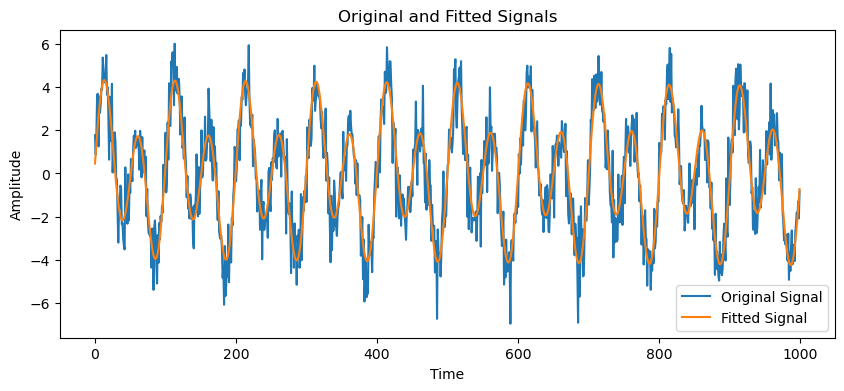

In [12]:
#import numpy as np
#import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate the same synthetic time series
np.random.seed(0)
n = 1000
t = np.arange(n)
signal = 3 * np.sin(2 * np.pi * t / 50) + 1.5 * np.sin(2 * np.pi * t / 100) + np.random.normal(0, 1, n)

# Perform Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n)

# Take the positive frequencies
positive_frequencies = frequencies[:n // 2]
positive_fft_result = np.abs(fft_result[:n // 2])

# Identify significant frequencies
significant_freqs = positive_frequencies[np.argsort(positive_fft_result)[-2:]]  # Top 2 significant frequencies
print("Significant frequencies:", significant_freqs)

# Define the sinusoidal model function
def sinusoidal_model(t, A1, w1, phi1, A2, w2, phi2):
    return A1 * np.sin(w1 * t + phi1) + A2 * np.sin(w2 * t + phi2)

# Initial guess for the parameters [A1, w1, phi1, A2, w2, phi2]
initial_guess = [3, 2 * np.pi * significant_freqs[0], 0, 1.5, 2 * np.pi * significant_freqs[1], 0]

# Fit the sinusoidal model to the data
params, covariance = curve_fit(sinusoidal_model, t, signal, p0=initial_guess)

# Extract the fitted parameters
A1, w1, phi1, A2, w2, phi2 = params

# Create the fitted model
fitted_signal = sinusoidal_model(t, A1, w1, phi1, A2, w2, phi2)

# Plot the original and fitted signals
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, fitted_signal, label='Fitted Signal')
plt.title('Original and Fitted Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()